# 1. Import the required libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib

from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.models import clone_model
from tensorflow.keras.models import Model
from keras.layers import Dropout

from tensorflow.keras.callbacks import LearningRateScheduler

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import cv2

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 2. Data Acquisition  -- Score: 0.5 Mark

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')
print(data_dir)

228813984/228813984 [==============================] - 1s 0us/step
/root/.keras/datasets/flower_photos


In [5]:
classes = os.listdir(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))

print(classes)
print(image_count)

['LICENSE.txt', 'tulips', 'daisy', 'dandelion', 'sunflowers', 'roses']
3670


In [6]:
ds = []
dir_name = pathlib.Path(archive).with_suffix('')
iterable_dir = os.listdir(dir_name)

for item in iterable_dir:
    if item.endswith(".txt"):
        os.remove(os.path.join(dir_name, item))

flower_data_dir = data_dir

for folder in os.listdir(flower_data_dir):
    for file in os.listdir(os.path.join(flower_data_dir, folder)):
        img_path = os.path.join(flower_data_dir, folder, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        ds.append({"image_path": img_path, "label": folder})

# Create a DataFrame from the dataset
df = pd.DataFrame(ds)

In [7]:
size = df.shape
print(size)
num_rows = df.shape[0]
num_columns = df.shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

(3670, 2)
Number of rows: 3670
Number of columns: 2


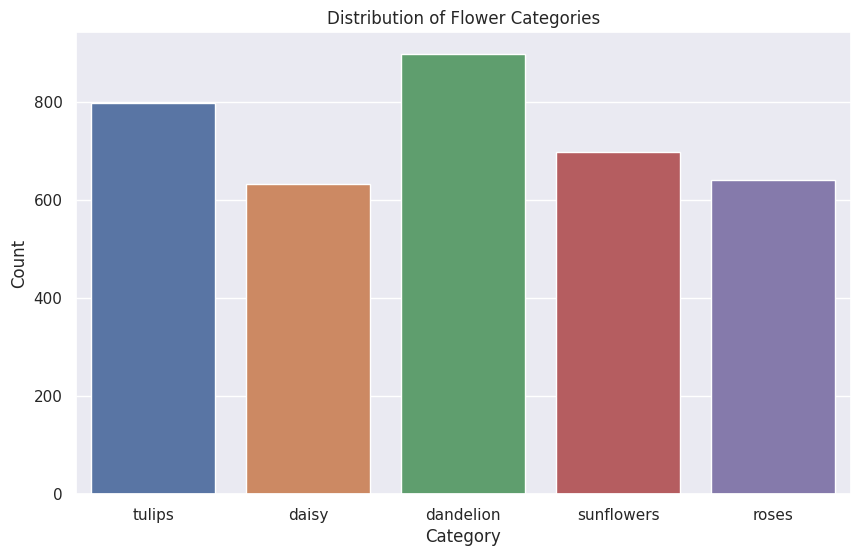

In [8]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="label")
plt.title("Distribution of Flower Categories")
plt.xlabel("Category")
plt.ylabel("Count")

# Display the plot
plt.show()

## 2.1 Write your observations from the above.

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label.




*   3670 flower images are there in dataset irrespective of the category they belongs.
*   Image data: The dataset includes a collection of flower images in a specific format.
*   The categories of flowers we want to classify.
*   Plotted





# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [9]:
orgnl_df = df.copy()

# Separate the features (X) and the target (y)
X = df.drop("label", axis=1)
y = df["label"]
print("feature (X): ", X)
print("the target (y)", y)

feature (X):                                               image_path
0     /root/.keras/datasets/flower_photos/tulips/700...
1     /root/.keras/datasets/flower_photos/tulips/451...
2     /root/.keras/datasets/flower_photos/tulips/556...
3     /root/.keras/datasets/flower_photos/tulips/318...
4     /root/.keras/datasets/flower_photos/tulips/135...
...                                                 ...
3665  /root/.keras/datasets/flower_photos/roses/3997...
3666  /root/.keras/datasets/flower_photos/roses/2152...
3667  /root/.keras/datasets/flower_photos/roses/1050...
3668  /root/.keras/datasets/flower_photos/roses/5687...
3669  /root/.keras/datasets/flower_photos/roses/3494...

[3670 rows x 1 columns]
the target (y) 0       tulips
1       tulips
2       tulips
3       tulips
4       tulips
         ...  
3665     roses
3666     roses
3667     roses
3668     roses
3669     roses
Name: label, Length: 3670, dtype: object


In [10]:
df = orgnl_df.copy()

print("df_head:", df.head(2))
print("df_tail:", df.tail(2))
print("")
# OneHotEncoding:To deal with categorical values we need to preprocess it using onehot ecnoding

# Convert the categorical label column to numerical values
label_categorical = df["label"].astype('category').cat.codes

# Apply one-hot encoding
encoded_label = to_categorical(label_categorical)

# Create a new DataFrame with the one-hot encoded labels
df_encoded = pd.concat([df.drop("label", axis=1), pd.DataFrame(encoded_label)], axis=1)
print("df_encoded head:", df_encoded.head(2))
print("df_encoded tail:", df_encoded.tail(2))

df_head:                                           image_path   label
0  /root/.keras/datasets/flower_photos/tulips/700...  tulips
1  /root/.keras/datasets/flower_photos/tulips/451...  tulips
df_tail:                                              image_path  label
3668  /root/.keras/datasets/flower_photos/roses/5687...  roses
3669  /root/.keras/datasets/flower_photos/roses/3494...  roses

df_encoded head:                                           image_path    0    1    2    3    4
0  /root/.keras/datasets/flower_photos/tulips/700...  0.0  0.0  0.0  0.0  1.0
1  /root/.keras/datasets/flower_photos/tulips/451...  0.0  0.0  0.0  0.0  1.0
df_encoded tail:                                              image_path    0    1    2    3  \
3668  /root/.keras/datasets/flower_photos/roses/5687...  0.0  0.0  1.0  0.0   
3669  /root/.keras/datasets/flower_photos/roses/3494...  0.0  0.0  1.0  0.0   

        4  
3668  0.0  
3669  0.0  


## 3.3 Split the data into training set and testing set

In [11]:
# practice to use a validation split when developing  model. We will use 80% of the images for training and 20% for validation.
batch_size = 32
img_height = 128
img_width = 128

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=1337,
  image_size=(img_height, img_width),
  batch_size=batch_size)

tr_class_names = train_ds.class_names
print(tr_class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [12]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=1337,
  image_size=(img_height, img_width),
  batch_size=batch_size)

vl_class_names = train_ds.class_names
print(vl_class_names)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [13]:
# In the training and validation datasets (train_ds and val_ds),
# the labels seem to be in a categorical format, which expects a one-hot encoded representation.

num_classes = orgnl_df['label'].unique()
train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, len(num_classes))))
val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, len(num_classes))))

## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present
* to encode categorical data
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


In [14]:
# The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general we should seek to make our input values small.
# Here, we will standardize values to be in the [0, 1] range.

normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.0 0.9922182


# 4. Deep Neural Network Architecture - Score: 2 Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.

In [15]:
tf.keras.backend.clear_session()
# Define the model architecture
image_size = (128, 128)
inputs = keras.Input(shape = image_size + (3,))

data_augmentation = keras.Sequential(
    [ layers.experimental.preprocessing.RandomFlip("horizontal"),
      layers.experimental.preprocessing.RandomRotation(0.5) ])

x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)

unique_values = orgnl_df['label'].unique()

if len(unique_values) == 2:
    output_activation = "sigmoid"
    units = 1
else:
    output_activation = "softmax"
    units = len(unique_values)

outputs = layers.Dense(units, activation = output_activation)(x)

model = keras.Model(inputs, outputs)
model.summary()

# Save the model to a file, anyhow not required but may be futher
model.save("model.h5")

# By using regularization techniques like L2 regularization on above cell, we can prevent overfitting
# and improve the generalization ability of our model.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 64)                3145792   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528   

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters



*   Number of layers: 8

*   Number of units in each layer: dense_15, 16, 17 have 64, 32, 16 units but dense_18 have condition, where flower_categories count taken under consideration e.g. if flower_categories == 2 than we have used sigmoid activation function with unit 1 otherwise softmax activation function with unit == flower_categories count

*   Total number of trainable parameters: 3,148,485

# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [16]:
# Configure the model for training
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [17]:
epochs = 20
history = model.fit(train_ds, epochs = epochs, validation_data = val_ds)

Epoch 1/20
92/92 [==============================] - 10s 93ms/step - loss: 3.4842 - accuracy: 0.2738 - val_loss: 3.4169 - val_accuracy: 0.2738
Epoch 2/20
92/92 [==============================] - 9s 91ms/step - loss: 3.3546 - accuracy: 0.2878 - val_loss: 3.2839 - val_accuracy: 0.3188
Epoch 3/20
92/92 [==============================] - 8s 84ms/step - loss: 3.2608 - accuracy: 0.3048 - val_loss: 3.2384 - val_accuracy: 0.2875
Epoch 4/20
92/92 [==============================] - 8s 83ms/step - loss: 3.1617 - accuracy: 0.3249 - val_loss: 3.1063 - val_accuracy: 0.3406
Epoch 5/20
92/92 [==============================] - 7s 75ms/step - loss: 3.0697 - accuracy: 0.3587 - val_loss: 3.0021 - val_accuracy: 0.3951
Epoch 6/20
92/92 [==============================] - 9s 97ms/step - loss: 2.9697 - accuracy: 0.3958 - val_loss: 2.9085 - val_accuracy: 0.4101
Epoch 7/20
92/92 [==============================] - 9s 90ms/step - loss: 2.8660 - accuracy: 0.4057 - val_loss: 2.7905 - val_accuracy: 0.4237
Epoch 8/20
9

:Justify your choice of optimizers and regulizations used and the hyperparameters tuned


**SGD Optimizer**

*   Simplicity, straightforward optimization algorithm. Loss function computed on small batches of data.
*   Efficiency: SGD processes data in small batches, can lead to faster convergence compared to other optimization algorithms, especially on large datasets.
*   Generalization property, randomly sampling small batches of data in each iteration, can help the model avoid getting stuck in local minima and find better solutions.
*   Memory Efficiency, requires less memory compared to algorithms that operate on the entire dataset at once.
*   SGD can still make progress in optimizing the model, where the gradients are noisy due to factors like data corruption or outliers
*   Parallelizability: SGD can be easily parallelized across multiple devices or processors. This makes it suitable for distributed computing frameworks, allowing for efficient training on clusters or GPUs.


**L2 regularization**

*   By using regularization techniques like L2 regularization on above cell, we can prevent overfitting and improve the generalization ability of our model.

# 6. Test the model - 0.5 marks


In [18]:
# Load the test dataset using image_dataset_from_directory
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=1337,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

test_ds = test_ds.map(lambda x, y: (x, tf.one_hot(y, len(num_classes))))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.
23/23 [==============================] - 1s 23ms/step - loss: 2.1633 - accuracy: 0.4687


# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


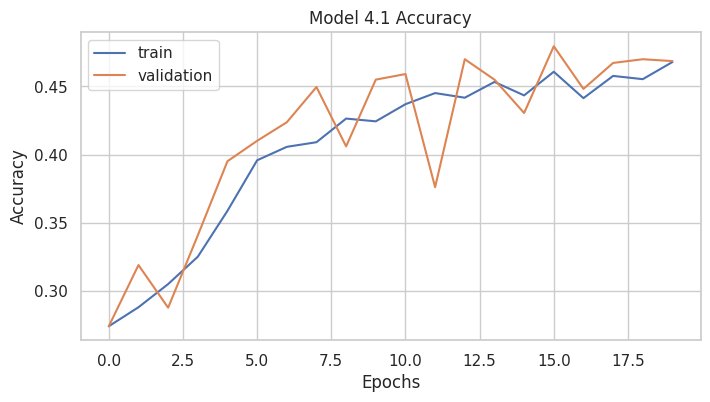

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 4.1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

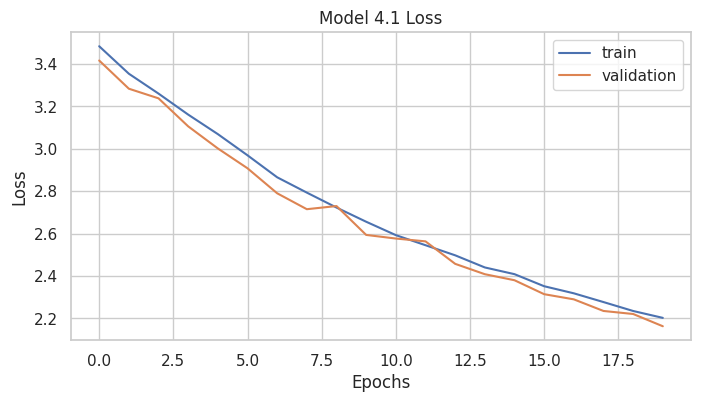

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model 4.1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [21]:
# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 2.1632814407348633
Test Accuracy: 0.46866485476493835


23/23 [==============================] - 1s 39ms/step


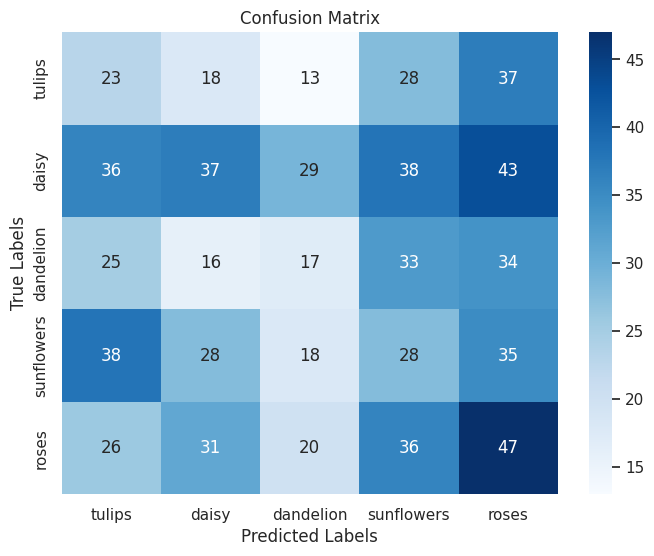

In [22]:
# Make predictions on the test dataset
predicted_probs = model.predict(test_ds)
predicted_labels = np.argmax(predicted_probs, axis=1)

# Get the true labels from the test dataset
true_labels = np.concatenate([y for x, y in test_ds], axis=0)
true_labels = np.argmax(true_labels, axis=1)

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = num_classes, yticklabels = num_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Compute accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
# Compute precision
precision = precision_score(true_labels, predicted_labels, average='weighted')
# Compute recall
recall = recall_score(true_labels, predicted_labels, average='weighted')
# Compute F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.20708446866485014
Precision: 0.21267568910600923
Recall: 0.20708446866485014
F1 Score: 0.20669376327395558


# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



In [24]:
y = data_augmentation(inputs)
y = layers.experimental.preprocessing.Rescaling(1.0 / 255)(y)

y = layers.Flatten()(y)
y = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), name='dense')(y)
y = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), name='dense_1')(y)

outputsY = layers.Dense(units, activation = output_activation, name='dense_3')(y)

model_8_1 = keras.Model(inputs, outputsY)
model_8_1.summary()

# Save the model to a file, anyhow not required but may be futher
model_8_1.save("model_8_1.h5")


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 64)                3145792   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 5)                 165 

In [25]:
z = data_augmentation(inputs)
z = layers.experimental.preprocessing.Rescaling(1.0 / 255)(z)

z = layers.Flatten()(z)
z = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), name='dense')(z)
z = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), name='dense_1')(z)
z = layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01), name='dense_2')(z)

outputsZ = layers.Dense(units, activation = output_activation, name='dense_3')(z)

model_8_2 = keras.Model(inputs, outputsZ)
model_8_2.summary()

# Save the model to a file, anyhow not required but may be futher
model_8_2.save("model_8_2.h5")

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 flatten_2 (Flatten)         (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 64)                3145792   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528 

In [26]:
opt_8_1 = keras.optimizers.SGD(learning_rate=0.01)
model_8_1.compile(optimizer = opt_8_1, loss ='categorical_crossentropy',metrics = ['accuracy'])

opt_8_2 = keras.optimizers.SGD(learning_rate=0.01)
model_8_2.compile(optimizer = opt_8_2, loss ='categorical_crossentropy',metrics = ['accuracy'])

In [27]:
print('Model 8.1 History:')
print('')
history_8_1 = model_8_1.fit(train_ds, epochs = epochs, validation_data = val_ds)

print('Model 8.2 History:')
print('')
history_8_2 = model_8_2.fit(train_ds, epochs = epochs, validation_data = val_ds)

Model 8.1 History:

Epoch 1/20
92/92 [==============================] - 8s 76ms/step - loss: 3.2951 - accuracy: 0.2861 - val_loss: 3.1013 - val_accuracy: 0.3501
Epoch 2/20
92/92 [==============================] - 7s 76ms/step - loss: 3.0768 - accuracy: 0.3614 - val_loss: 2.9477 - val_accuracy: 0.3856
Epoch 3/20
92/92 [==============================] - 9s 95ms/step - loss: 2.9166 - accuracy: 0.4019 - val_loss: 2.9641 - val_accuracy: 0.3597
Epoch 4/20
92/92 [==============================] - 8s 90ms/step - loss: 2.8278 - accuracy: 0.4135 - val_loss: 2.7960 - val_accuracy: 0.4169
Epoch 5/20
92/92 [==============================] - 8s 86ms/step - loss: 2.7636 - accuracy: 0.4125 - val_loss: 2.7393 - val_accuracy: 0.4305
Epoch 6/20
92/92 [==============================] - 8s 85ms/step - loss: 2.6939 - accuracy: 0.4298 - val_loss: 2.6482 - val_accuracy: 0.4346
Epoch 7/20
92/92 [==============================] - 9s 90ms/step - loss: 2.6321 - accuracy: 0.4302 - val_loss: 2.5721 - val_accuracy: 

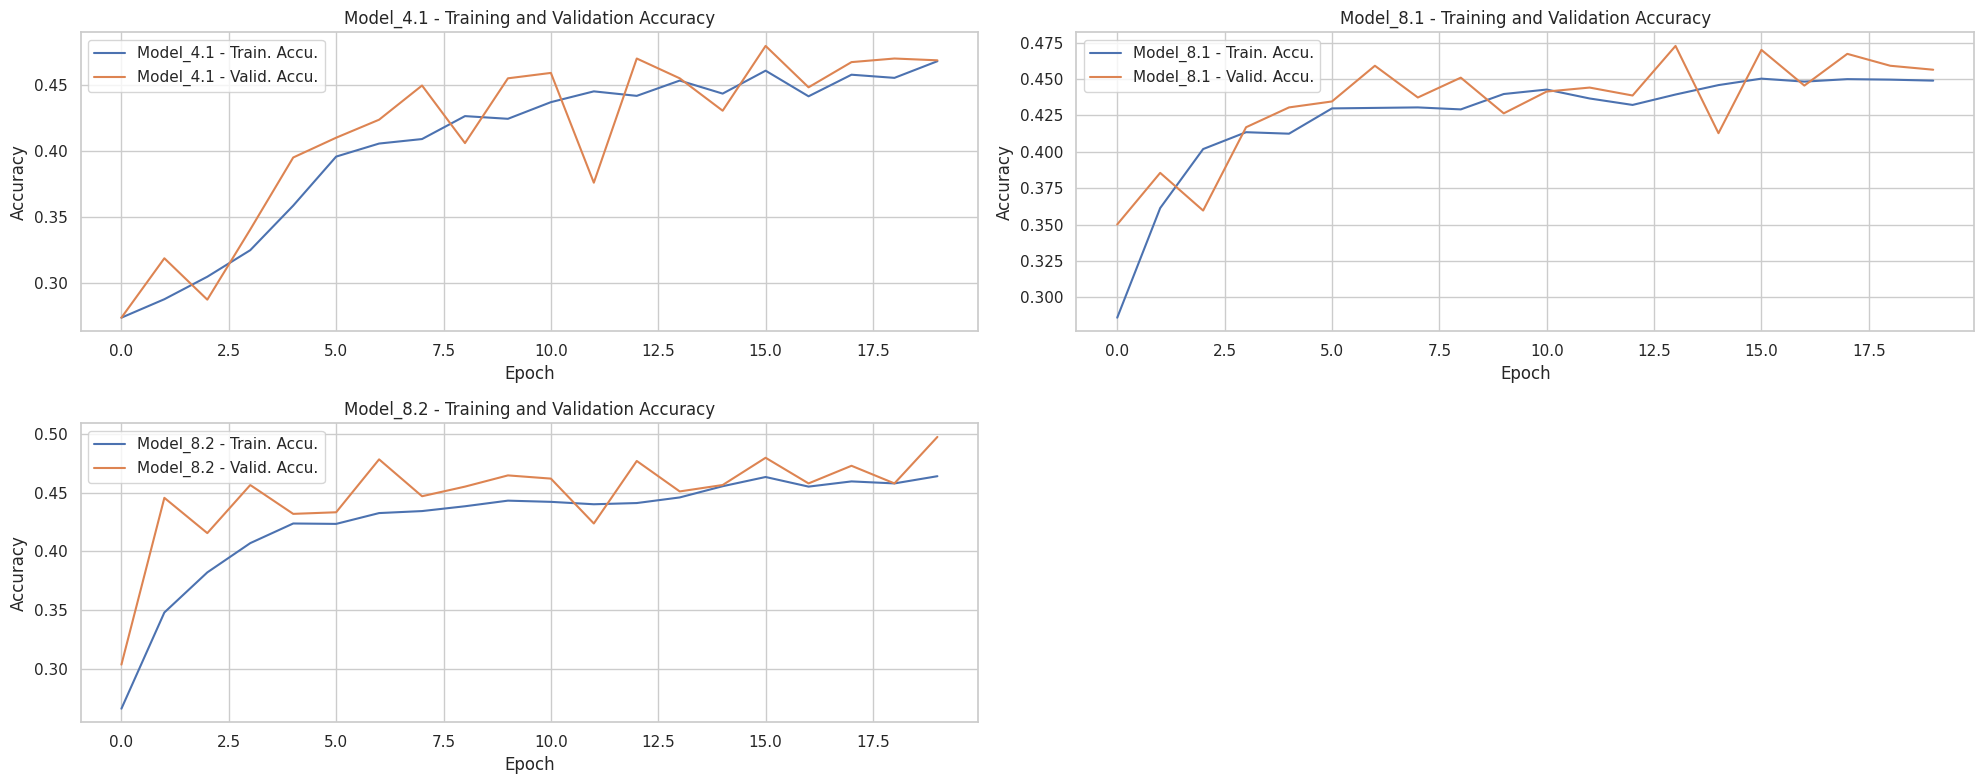

In [28]:
# Plot the training and validation accuracy for all models
plt.figure(figsize=(20, 8))

# Model_4.1
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Model_4.1 - Train. Accu.')
plt.plot(history.history['val_accuracy'], label='Model_4.1 - Valid. Accu.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_4.1 - Training and Validation Accuracy')
plt.legend()

# Model_8.1
plt.subplot(2, 2, 2)
plt.plot(history_8_1.history['accuracy'], label='Model_8.1 - Train. Accu.')
plt.plot(history_8_1.history['val_accuracy'], label='Model_8.1 - Valid. Accu.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_8.1 - Training and Validation Accuracy')
plt.legend()

# Model_8.2
plt.subplot(2, 2, 3)
plt.plot(history_8_2.history['accuracy'], label='Model_8.2 - Train. Accu.')
plt.plot(history_8_2.history['val_accuracy'], label='Model_8.2 - Valid. Accu.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_8.2 - Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [29]:
a = data_augmentation(inputs)
a = layers.experimental.preprocessing.Rescaling(1.0 / 255)(a)

a = layers.Flatten()(a)
a = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), name='dense')(a)
a = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), name='dense_1')(a)
a = layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01), name='dense_2')(a)
a = layers.Dropout(0.25)(a)

outputsA = layers.Dense(units, activation = output_activation, name='dense_3')(a)

model_9_1 = keras.Model(inputs, outputsA)
model_9_1.summary()

# Save the model to a file, anyhow not required but may be futher
model_9_1.save("model_9_1.h5")

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 flatten_3 (Flatten)         (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 64)                3145792   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528 

In [30]:
b = data_augmentation(inputs)
b = layers.experimental.preprocessing.Rescaling(1.0 / 255)(b)

b = layers.Flatten()(b)
b = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), name='dense')(b)
b = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), name='dense_1')(b)
b = layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01), name='dense_2')(b)
b = layers.Dropout(0.25)(b)
b = layers.Dense(80, activation='relu', kernel_regularizer=regularizers.l2(1e-04))(b)

outputsB = layers.Dense(units, activation = output_activation, name='dense_5')(b)

model_9_2 = keras.Model(inputs, outputsB)
model_9_2.summary()

# Save the model to a file, anyhow not required but may be futher
model_9_2.save("model_9_2.h5")

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 flatten_4 (Flatten)         (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 64)                3145792   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528 

In [31]:
opt_9_1 = keras.optimizers.SGD(learning_rate=0.01)
model_9_1.compile(optimizer = opt_9_1, loss ='categorical_crossentropy',metrics = ['accuracy'])

opt_9_2 = keras.optimizers.SGD(learning_rate=0.01)
model_9_2.compile(optimizer = opt_9_2, loss ='categorical_crossentropy',metrics = ['accuracy'])

In [32]:
print('Model 9.1 History:')
print('')
history_9_1 = model_9_1.fit(train_ds, epochs = epochs, validation_data = val_ds)

print('Model 9.2 History:')
print('')
history_9_2 = model_9_2.fit(train_ds, epochs = epochs, validation_data = val_ds)

Model 9.1 History:

Epoch 1/20
92/92 [==============================] - 11s 105ms/step - loss: 3.5059 - accuracy: 0.2415 - val_loss: 3.4078 - val_accuracy: 0.2970
Epoch 2/20
92/92 [==============================] - 8s 89ms/step - loss: 3.3705 - accuracy: 0.2844 - val_loss: 3.2941 - val_accuracy: 0.3188
Epoch 3/20
92/92 [==============================] - 7s 75ms/step - loss: 3.2730 - accuracy: 0.3232 - val_loss: 3.2127 - val_accuracy: 0.3828
Epoch 4/20
92/92 [==============================] - 8s 90ms/step - loss: 3.1826 - accuracy: 0.3321 - val_loss: 3.0952 - val_accuracy: 0.3951
Epoch 5/20
92/92 [==============================] - 11s 115ms/step - loss: 3.0826 - accuracy: 0.3416 - val_loss: 2.9882 - val_accuracy: 0.4455
Epoch 6/20
92/92 [==============================] - 7s 79ms/step - loss: 3.0013 - accuracy: 0.3597 - val_loss: 2.8849 - val_accuracy: 0.4196
Epoch 7/20
92/92 [==============================] - 9s 93ms/step - loss: 2.9389 - accuracy: 0.3532 - val_loss: 2.8025 - val_accura

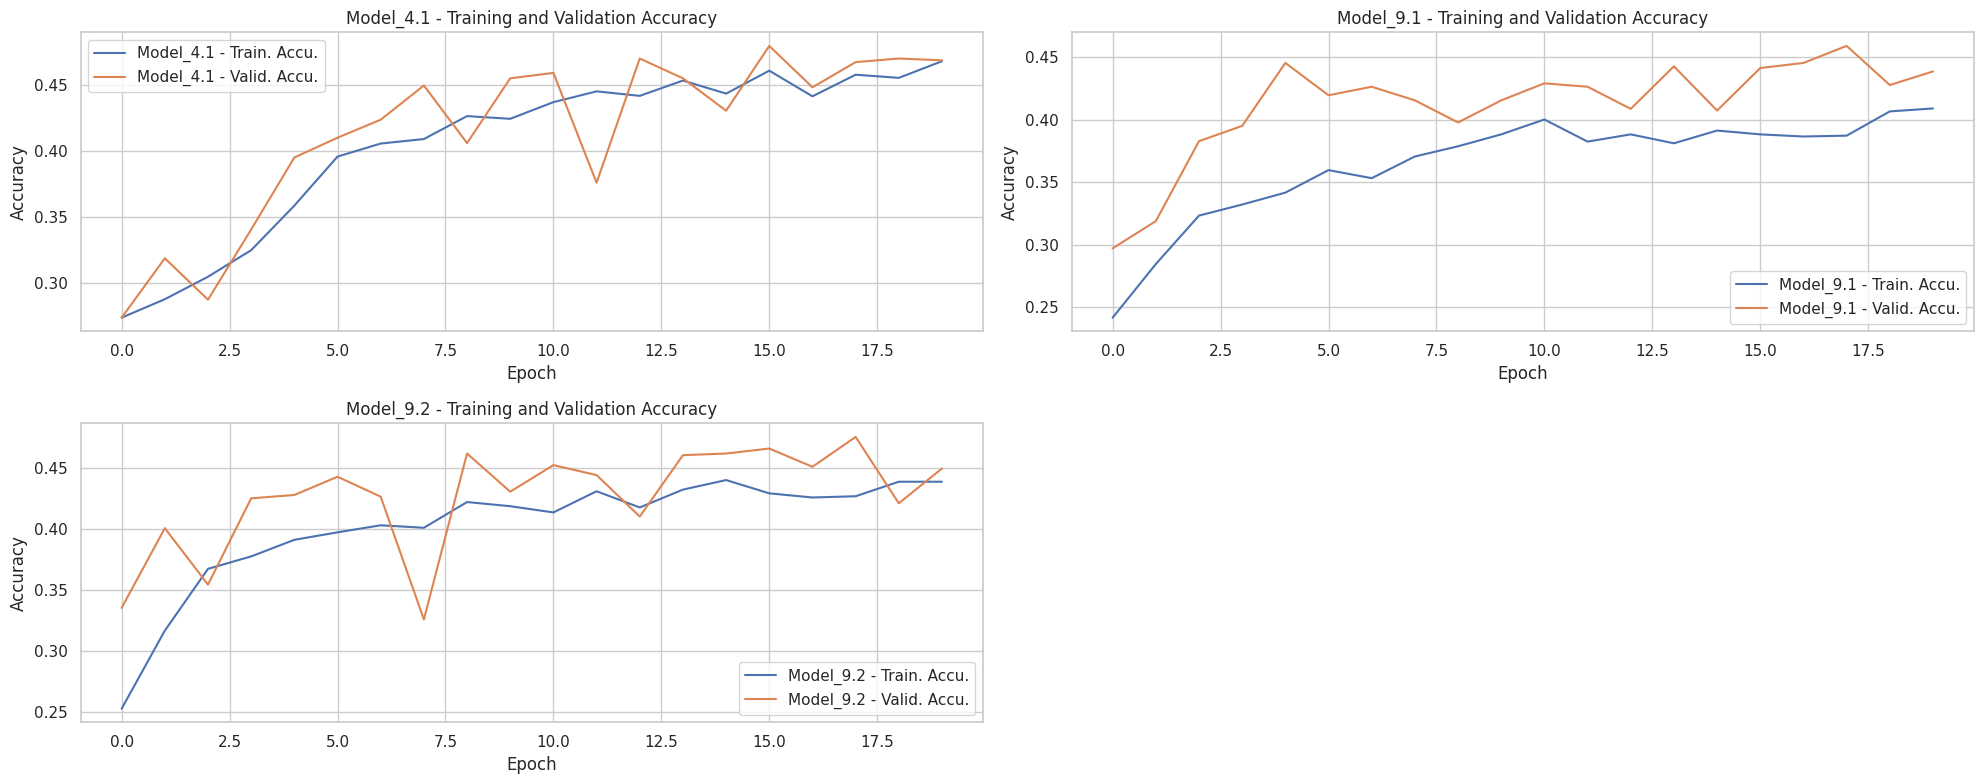

In [33]:
# Plot the training and validation accuracy for all models
plt.figure(figsize=(20, 8))

# Model_4.1
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Model_4.1 - Train. Accu.')
plt.plot(history.history['val_accuracy'], label='Model_4.1 - Valid. Accu.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_4.1 - Training and Validation Accuracy')
plt.legend()

# Model_9.1
plt.subplot(2, 2, 2)
plt.plot(history_9_1.history['accuracy'], label='Model_9.1 - Train. Accu.')
plt.plot(history_9_1.history['val_accuracy'], label='Model_9.1 - Valid. Accu.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_9.1 - Training and Validation Accuracy')
plt.legend()

# Model_9.2
plt.subplot(2, 2, 3)
plt.plot(history_9_2.history['accuracy'], label='Model_9.2 - Train. Accu.')
plt.plot(history_9_2.history['val_accuracy'], label='Model_9.2 - Valid. Accu.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_9.2 - Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [38]:
rms_opt = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.8)
model.compile(optimizer = rms_opt, loss ='categorical_crossentropy',metrics = ['accuracy'])
print('Model 10.1 History:')
history_10_1 = model.fit(train_ds, epochs = epochs, validation_data = val_ds)

print('')

adam_opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = adam_opt, loss ='categorical_crossentropy',metrics = ['accuracy'])
print('Model 10.2 History:')
history_10_2 = model.fit(train_ds, epochs = epochs, validation_data = val_ds)

Model 10.1 History:
Epoch 1/20
92/92 [==============================] - 10s 93ms/step - loss: 1.5431 - accuracy: 0.3661 - val_loss: 1.4994 - val_accuracy: 0.3460
Epoch 2/20
92/92 [==============================] - 10s 105ms/step - loss: 1.5140 - accuracy: 0.3699 - val_loss: 1.4253 - val_accuracy: 0.4414
Epoch 3/20
92/92 [==============================] - 10s 106ms/step - loss: 1.4986 - accuracy: 0.3801 - val_loss: 1.3954 - val_accuracy: 0.4346
Epoch 4/20
92/92 [==============================] - 10s 112ms/step - loss: 1.5029 - accuracy: 0.3879 - val_loss: 1.5026 - val_accuracy: 0.3542
Epoch 5/20
92/92 [==============================] - 9s 93ms/step - loss: 1.4987 - accuracy: 0.3736 - val_loss: 1.5678 - val_accuracy: 0.3556
Epoch 6/20
92/92 [==============================] - 8s 84ms/step - loss: 1.4874 - accuracy: 0.3815 - val_loss: 1.4341 - val_accuracy: 0.4114
Epoch 7/20
92/92 [==============================] - 9s 99ms/step - loss: 1.4985 - accuracy: 0.3852 - val_loss: 1.4477 - val_acc

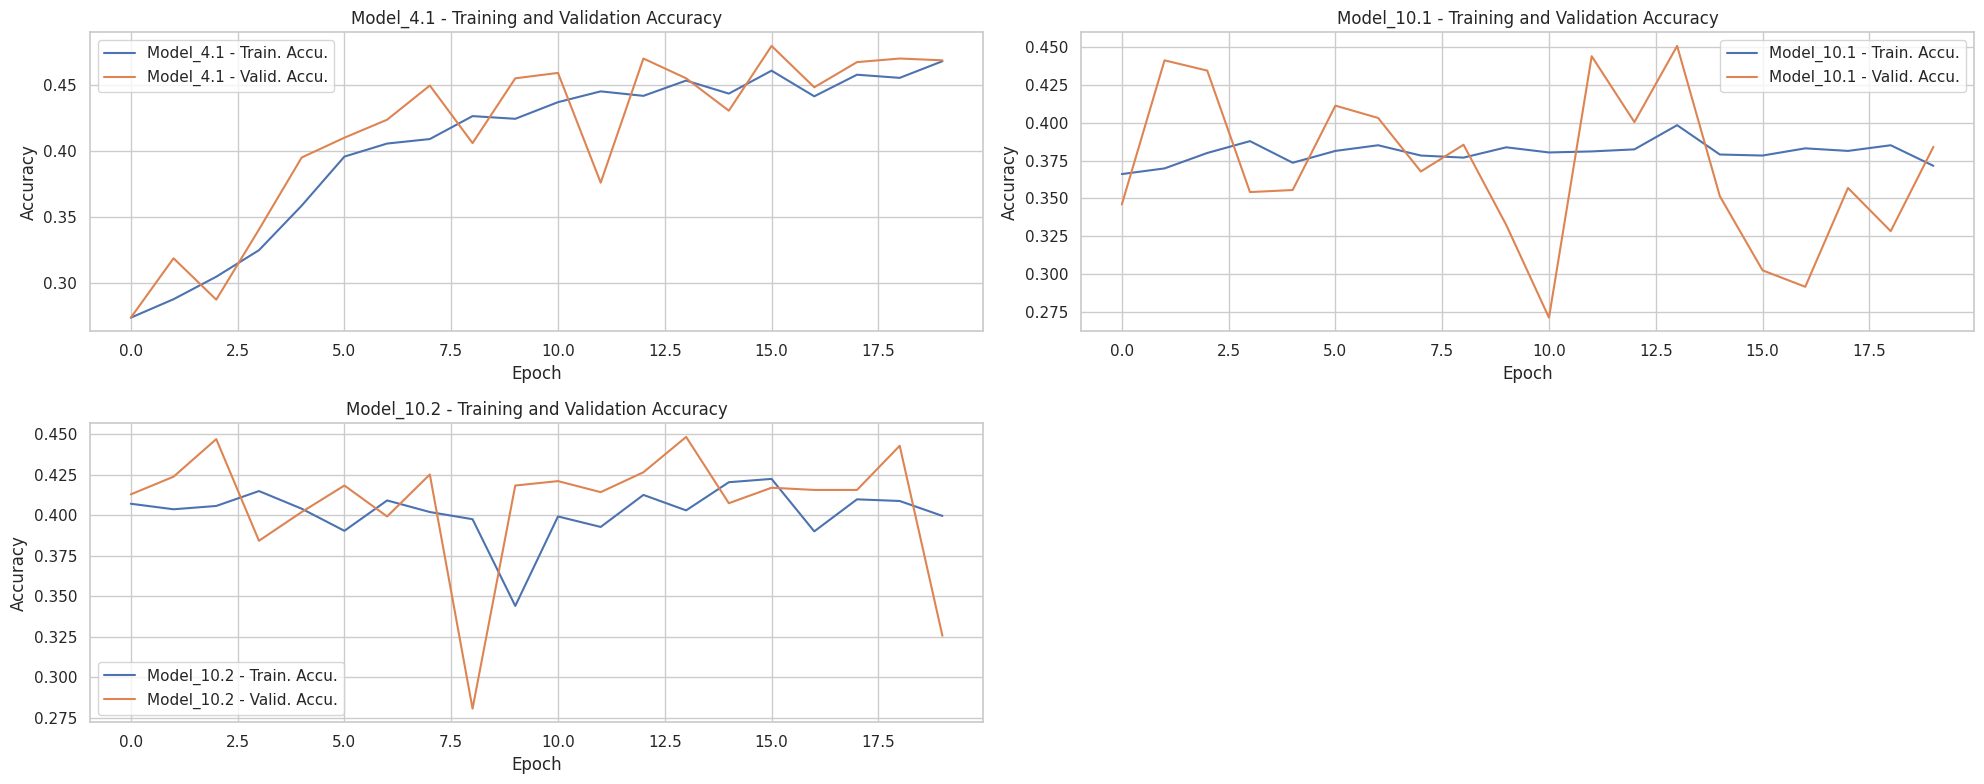

In [39]:
# Plot the training and validation accuracy for all models
plt.figure(figsize=(20, 8))

# Model_4.1
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Model_4.1 - Train. Accu.')
plt.plot(history.history['val_accuracy'], label='Model_4.1 - Valid. Accu.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_4.1 - Training and Validation Accuracy')
plt.legend()

# Model_10.1
plt.subplot(2, 2, 2)
plt.plot(history_10_1.history['accuracy'], label='Model_10.1 - Train. Accu.')
plt.plot(history_10_1.history['val_accuracy'], label='Model_10.1 - Valid. Accu.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_10.1 - Training and Validation Accuracy')
plt.legend()

# Model_10.2
plt.subplot(2, 2, 3)
plt.plot(history_10_2.history['accuracy'], label='Model_10.2 - Train. Accu.')
plt.plot(history_10_2.history['val_accuracy'], label='Model_10.2 - Valid. Accu.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_10.2 - Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [40]:
# In 4.1 We just developed the model and in 5.1 after compiling with SGD-optimizer and using L- regularization, we evaluated the model on
# test_ds and found the loss: 2.1567 and accuracy: 0.4864. To evaluate better performance we need to evaluate models that developed in section 8, 9
# and 10.

print('Model 5.1: Test loss: 2.1633 and Test accuracy: 0.4687')

test_loss_8_1, test_accuracys_8_1 = model_8_1.evaluate(test_ds)
print('Model 8.1: Test loss: ', test_loss_8_1, 'and Test accuracy: ', test_accuracys_8_1)

test_loss_8_2, test_accuracys_8_2 = model_8_2.evaluate(test_ds)
print('Model 8.2: Test loss: ', test_loss_8_2, 'and Test accuracy: ', test_accuracys_8_2)

test_loss_9_1, test_accuracys_9_1 = model_9_1.evaluate(test_ds)
print('Model 9.1: Test loss: ', test_loss_9_1, 'and Test accuracy: ', test_accuracys_9_1)

test_loss_9_2, test_accuracys_9_2 = model_9_2.evaluate(test_ds)
print('Model 9.2: Test loss: ', test_loss_9_2, 'and Test accuracy: ', test_accuracys_9_2)

test_loss_10_1, test_accuracys_10_1 = model.evaluate(test_ds)
print('Model 10.1: Test loss: ', test_loss_10_1, 'and Test accuracy: ', test_accuracys_10_1)

test_loss_10_2, test_accuracys_10_2 = model.evaluate(test_ds)
print('Model 10.2: Test loss: ', test_loss_10_2, 'and Test accuracy: ', test_accuracys_10_2)

Model 5.1: Test loss: 2.1567 and Test accuracy: 0.4864
23/23 [==============================] - 1s 23ms/step - loss: 2.0707 - accuracy: 0.4564
Model 8.1: Test loss:  2.0707294940948486 and Test accuracy:  0.4564032554626465
23/23 [==============================] - 1s 24ms/step - loss: 2.1447 - accuracy: 0.4973
Model 8.2: Test loss:  2.1446707248687744 and Test accuracy:  0.4972752034664154
23/23 [==============================] - 1s 23ms/step - loss: 2.2159 - accuracy: 0.4387
Model 9.1: Test loss:  2.2159273624420166 and Test accuracy:  0.4386920928955078
23/23 [==============================] - 1s 24ms/step - loss: 2.1677 - accuracy: 0.4496
Model 9.2: Test loss:  2.167745590209961 and Test accuracy:  0.4495912790298462
23/23 [==============================] - 1s 23ms/step - loss: 1.6612 - accuracy: 0.3256
Model 10.1: Test loss:  1.6612040996551514 and Test accuracy:  0.3256130814552307
23/23 [==============================] - 1s 23ms/step - loss: 1.6612 - accuracy: 0.3256
Model 10.2: 

We observed that the model which we developed at very initial, in section-4.1 `(using SGD optimizer and L2 regularization)` and the model, we modified in section-8.2, `(increament layer by 1)`, have largest accuracy values, and perfomed better.
By adding `Dropout layer of ratio 0.25` and along with `L2 regulariser with factor 1e−04` didn't appriciated the model performace.
Even changing the optimizer didn't enhanced the model performace, decreased instead.

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck